## More Image Analysis!

In [1]:
%pylab inline

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.image as mpimg

In [3]:
img = mpimg.imread("./paper.png")
img = img[:,:,:3].sum(axis=2)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x112089c90>)

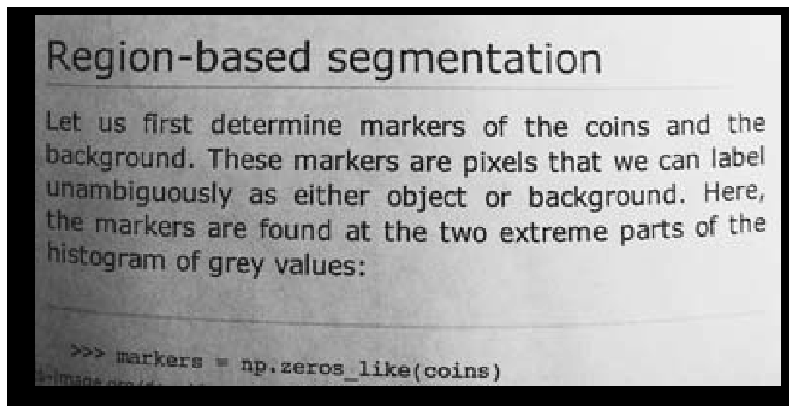

In [4]:
image_show(img)

(array([54252., 12713., 14595., 24438., 31361., 48309., 56625., 49080.,
        92931., 63104.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ],
       dtype=float32),
 <a list of 10 Patch objects>)

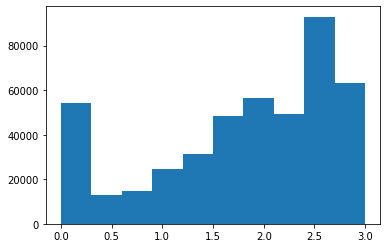

In [5]:
hist(img.flatten())

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116342e50>)

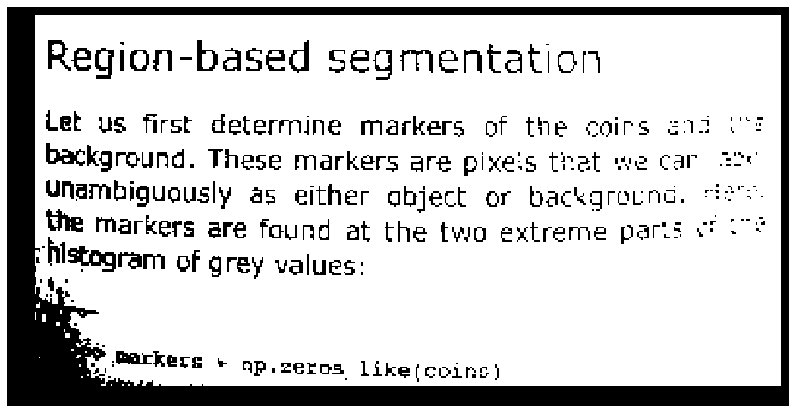

In [11]:
text_segmented = img > 1.00
image_show(text_segmented)

In [14]:
#"flat fielding"! "mean fielding"

from scipy import ndimage

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117a8f0d0>)

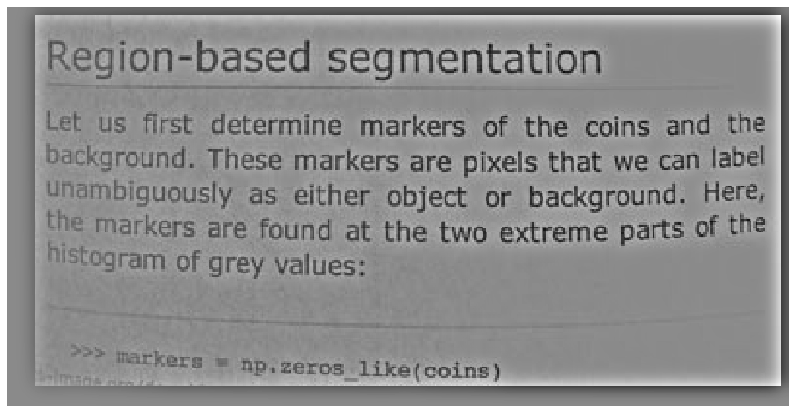

In [17]:
image_show(img - ndimage.gaussian_filter(img,10))

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1192a47d0>)

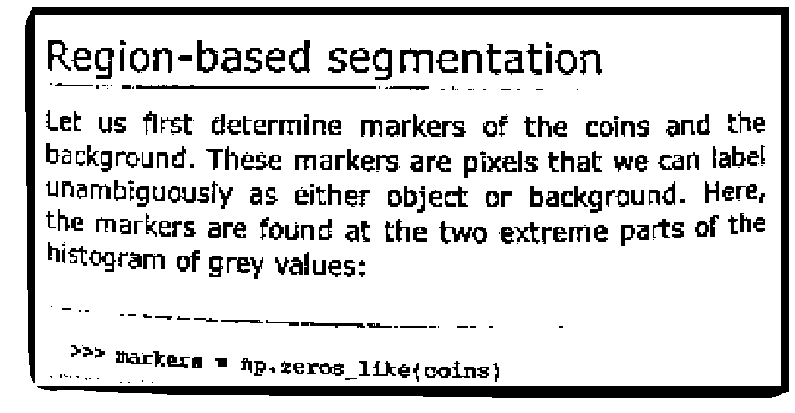

In [22]:
new_image = img - ndimage.gaussian_filter(img,10)


text_segmented = new_image > -.20

image_show(text_segmented)

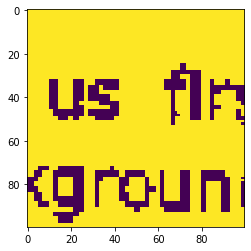

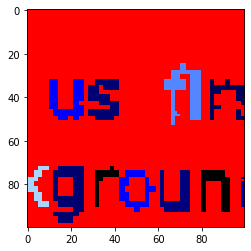

In [32]:
label_im,nb_labels = ndimage.label(1-text_segmented)

imshow(text_segmented[100:200,100:200])
plt.show()
imshow(label_im[100:200,100:200],cmap="flag")
plt.show()

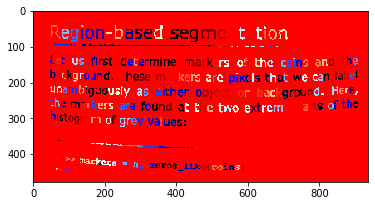

In [33]:
imshow(label_im,cmap="flag")


348
0 444


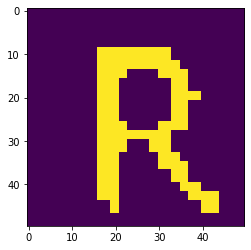

1 453


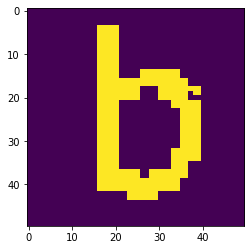

2 458


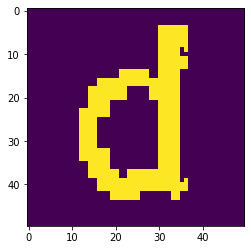

3 282


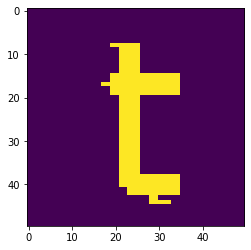

4 294


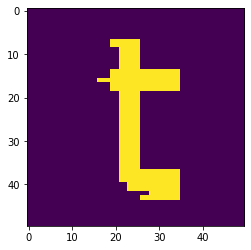

5 315


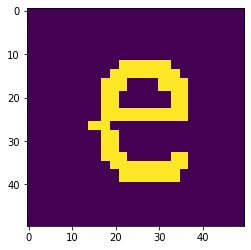

6 459


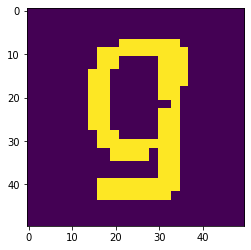

7 134


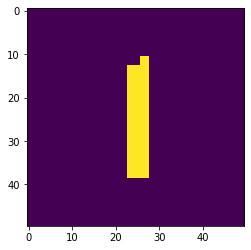

8 332


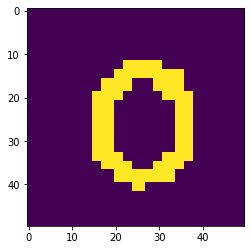

9 372


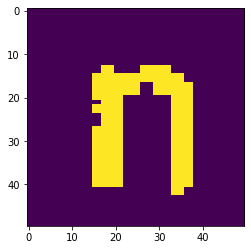

10 395


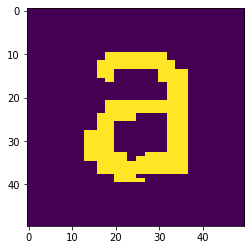

11 324


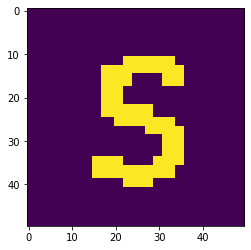

12 384


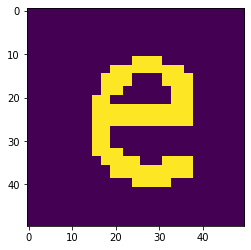

13 334


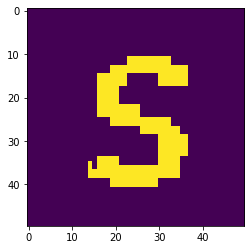

14 387


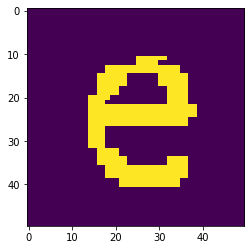

15 471


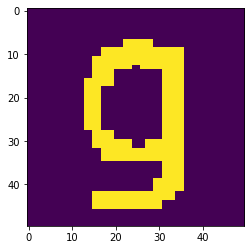

16 373


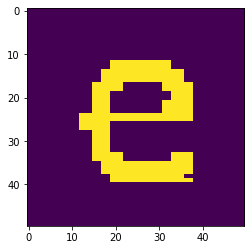

17 376


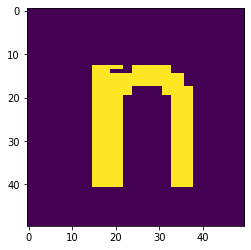

18 389


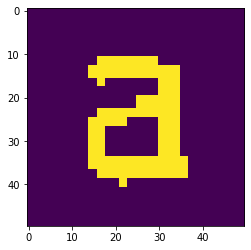

19 186


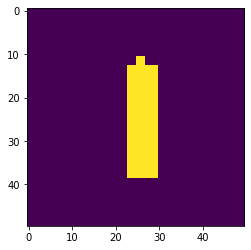

20 343


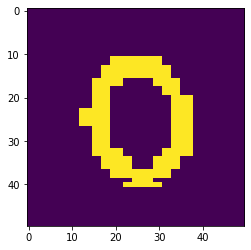

21 339


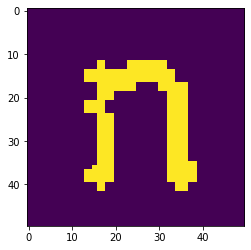

22 104


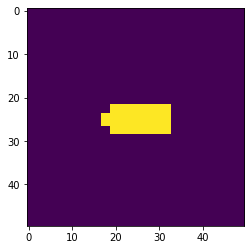

23 102


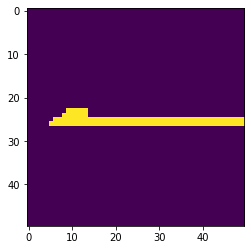

24 55


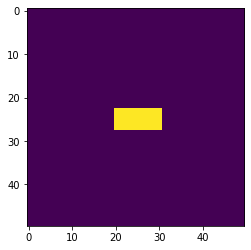

25 159


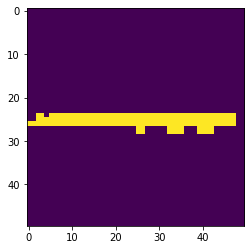

26 129


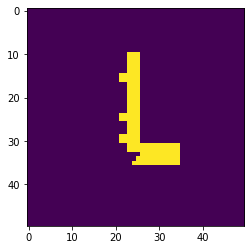

27 120


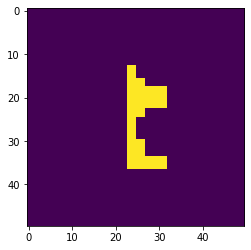

28 235


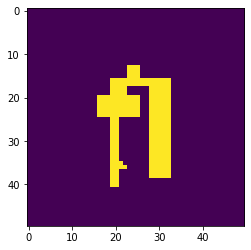

29 160


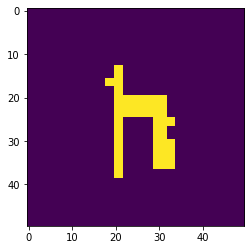

30 378


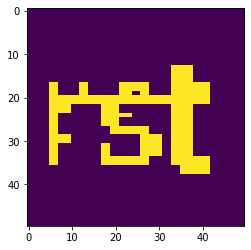

31 231


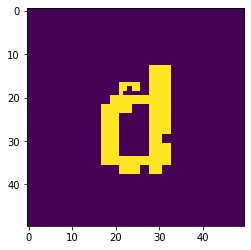

32 116


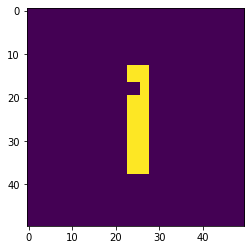

33 232


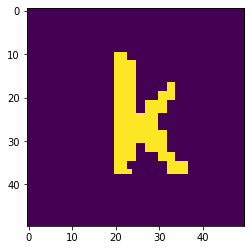

34 218


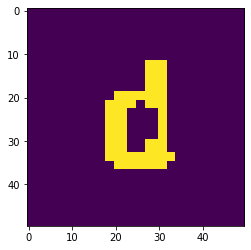

35 145


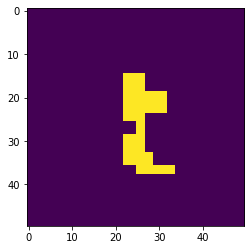

36 182


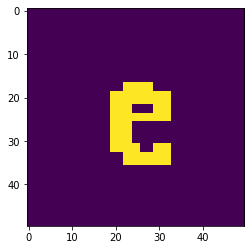

37 122


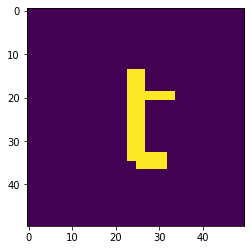

38 131


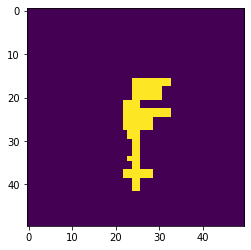

39 168


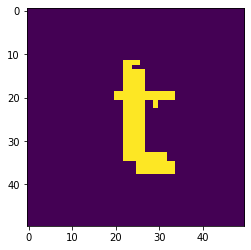

40 236


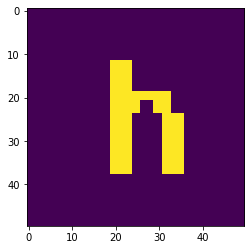

41 180


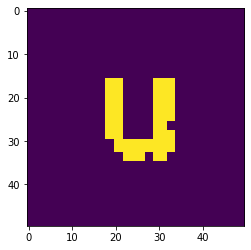

42 183


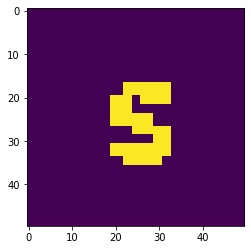

43 168


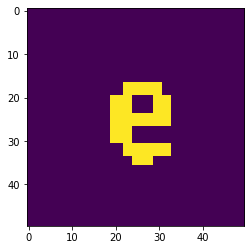

44 166


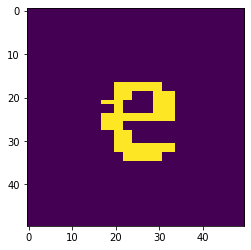

45 156


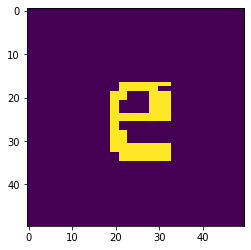

46 117


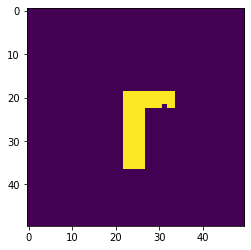

47 278


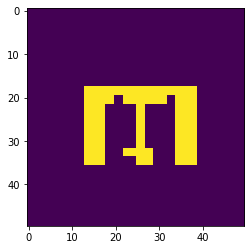

48 178


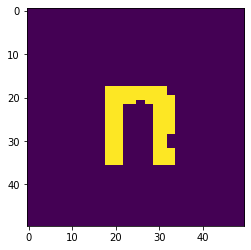

49 190


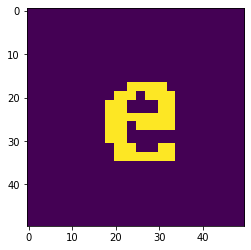

50 278


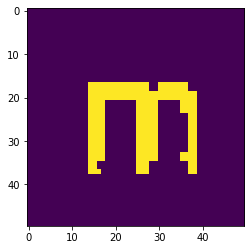

51 209


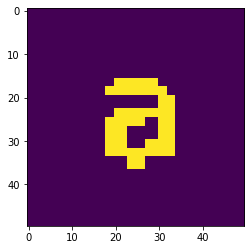

52 100


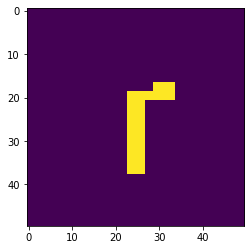

53 190


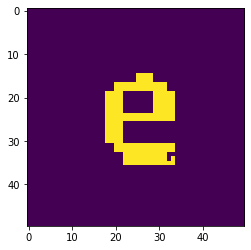

54 178


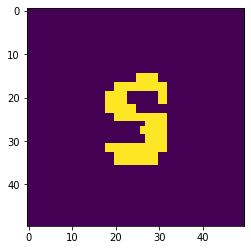

55 205


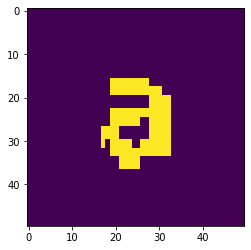

56 166


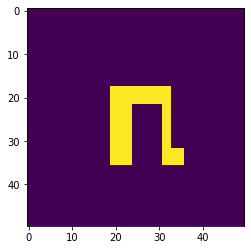

57 115


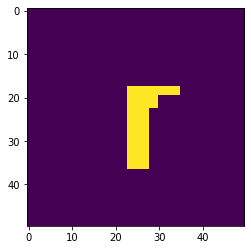

58 178


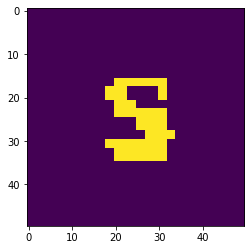

59 178


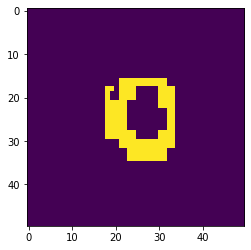

60 187


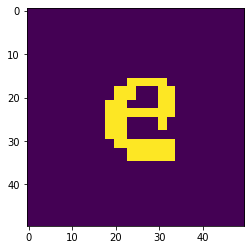

61 159


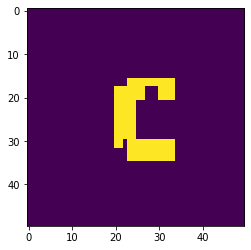

62 163


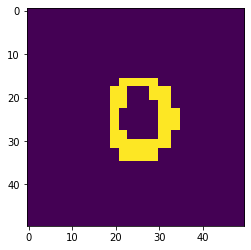

63 61


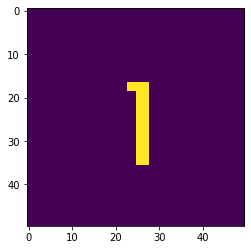

64 201


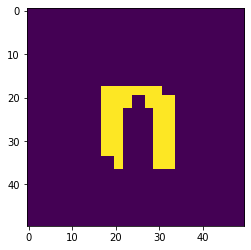

65 207


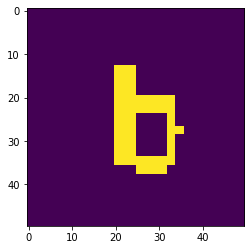

66 176


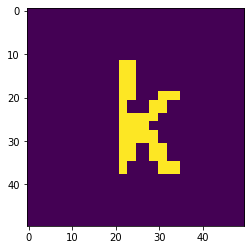

67 58


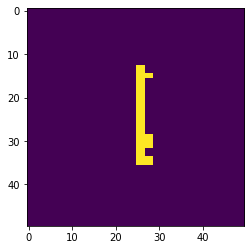

68 193


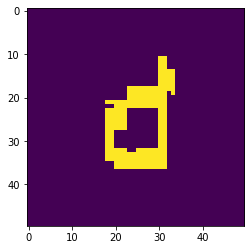

69 227


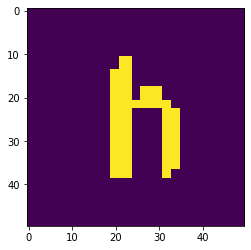

70 94


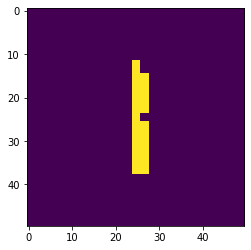

71 217


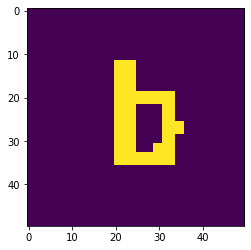

72 120


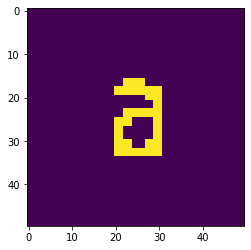

73 179


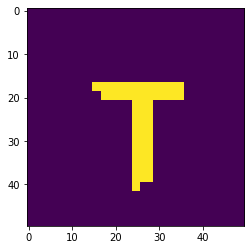

74 225


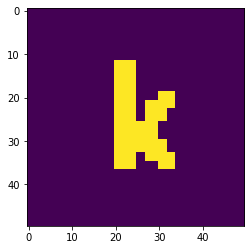

75 99


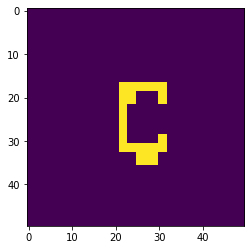

76 248


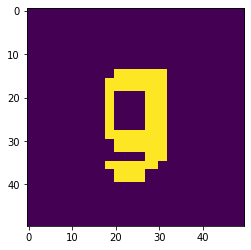

77 69


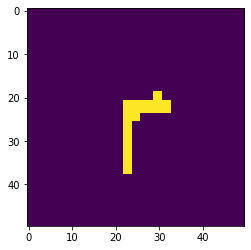

78 130


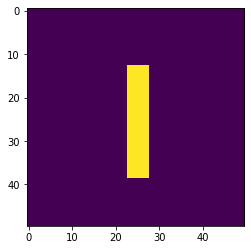

79 237


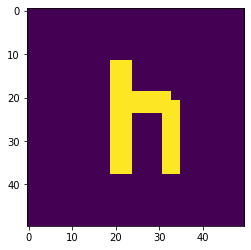

80 158


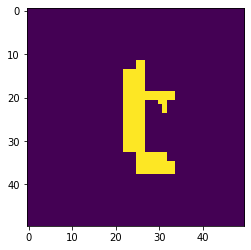

81 159


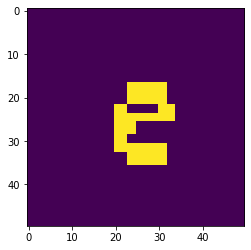

82 146


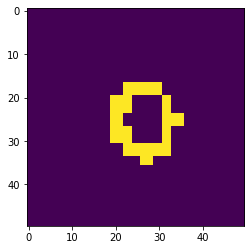

83 164


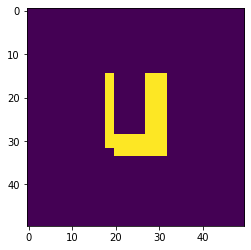

84 143


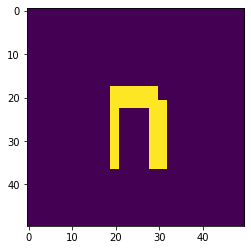

85 163


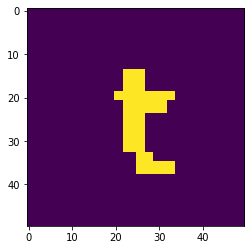

86 152


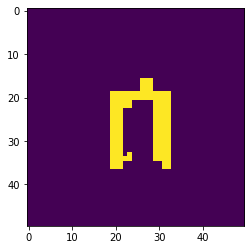

87 185


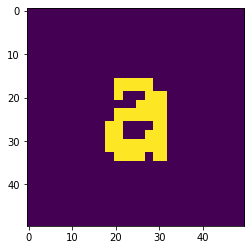

88 319


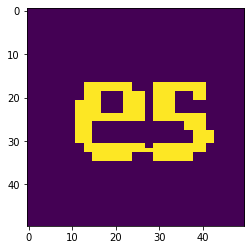

89 159


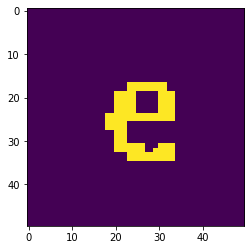

90 268


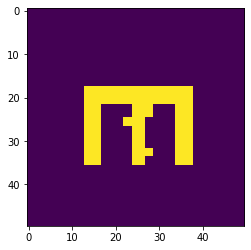

91 161


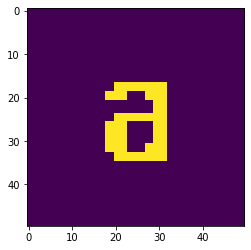

92 118


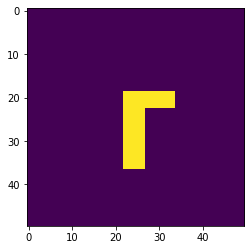

93 191


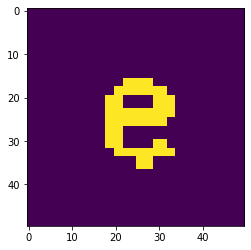

94 306


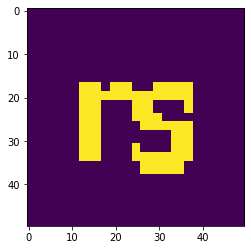

95 212


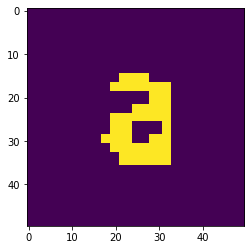

96 198


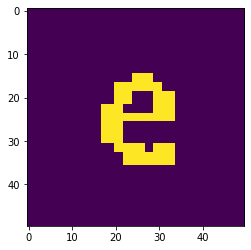

97 192


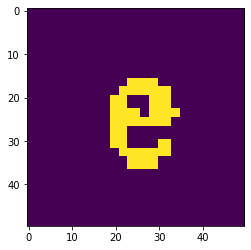

98 126


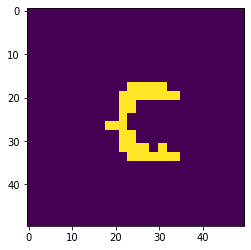

99 161


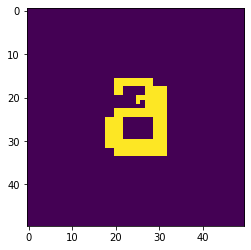

100 105


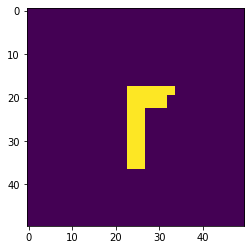

101 258


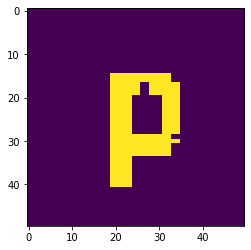

102 86


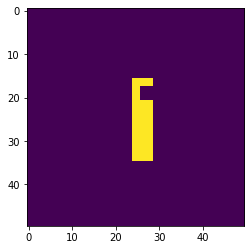

103 183


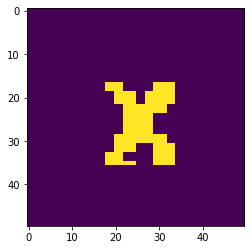

104 188


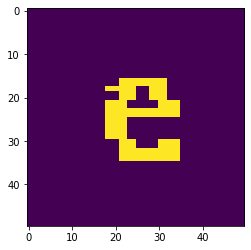

105 190


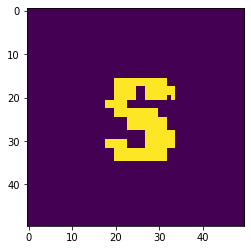

106 197


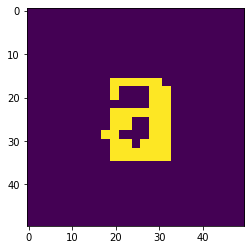

107 238


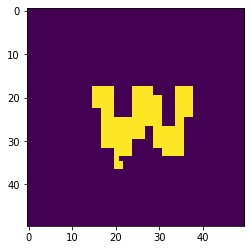

108 169


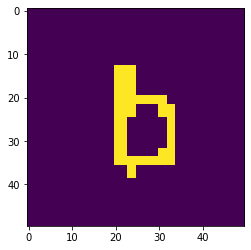

109 114


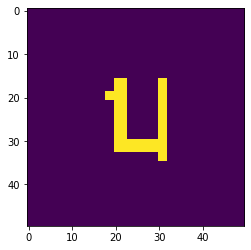

110 161


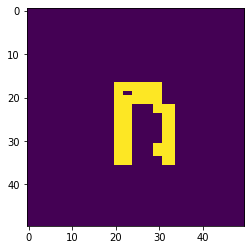

111 92


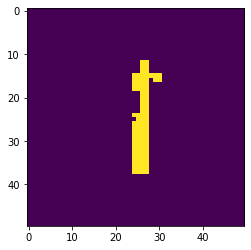

112 219


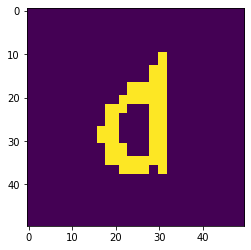

113 236


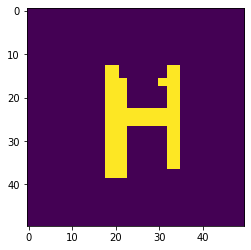

114 137


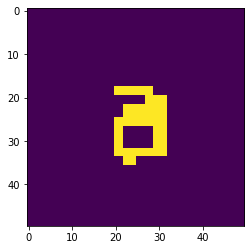

115 212


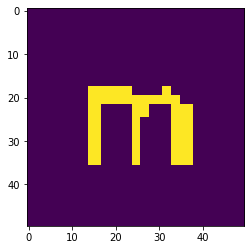

116 221


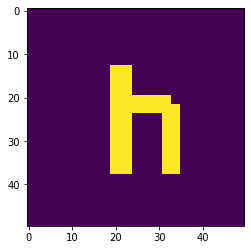

117 183


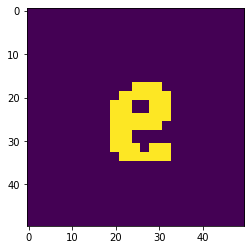

118 65


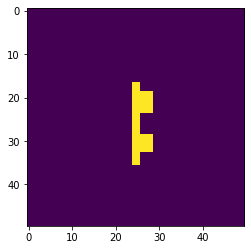

119 259


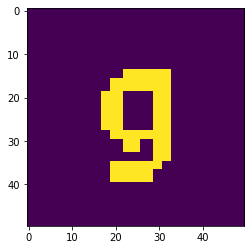

120 145


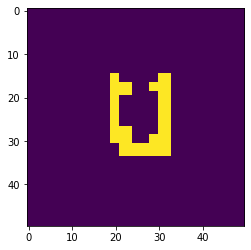

121 167


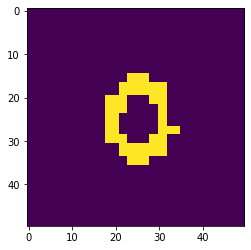

122 111


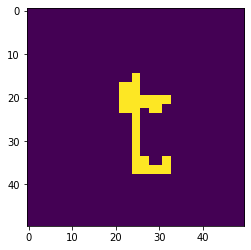

123 239


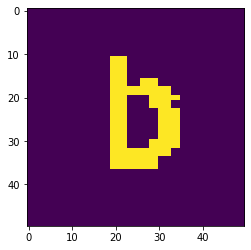

124 333


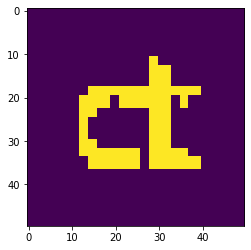

125 256


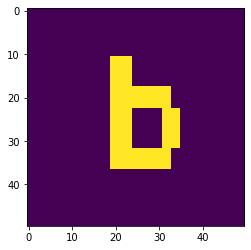

126 231


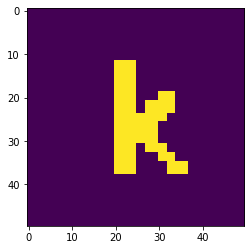

127 172


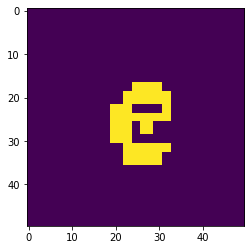

128 84


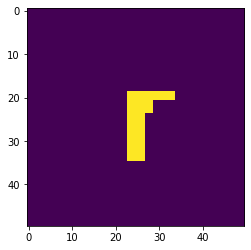

129 178


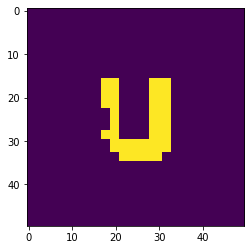

130 166


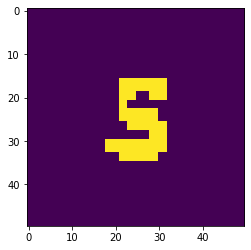

131 179


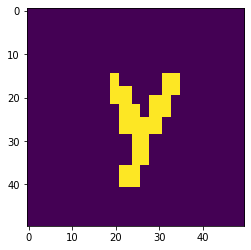

132 222


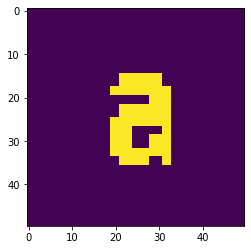

133 160


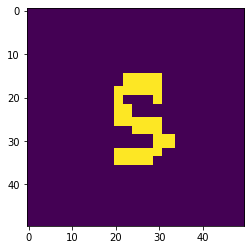

134 182


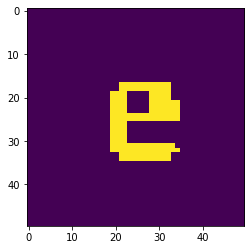

135 86


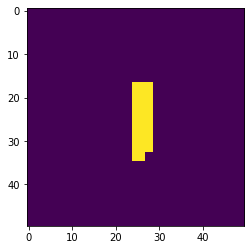

136 301


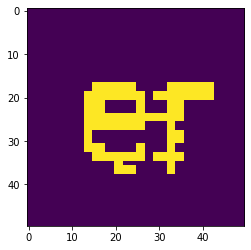

137 214


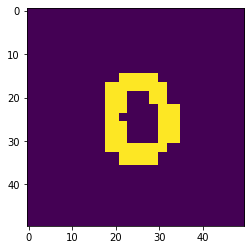

138 263


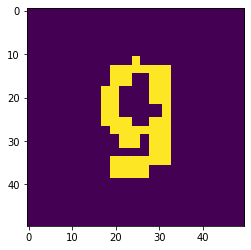

139 101


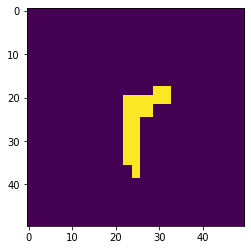

140 175


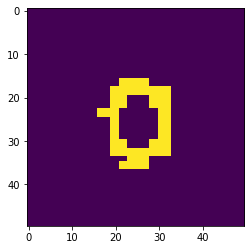

141 182


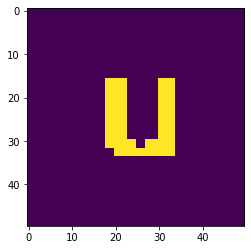

142 150


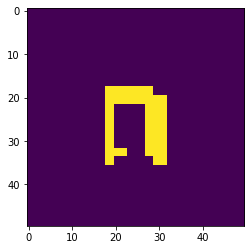

143 111


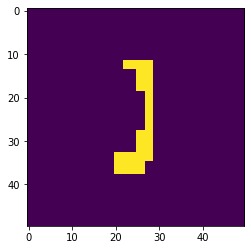

144 183


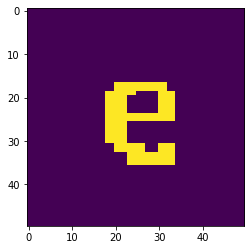

145 190


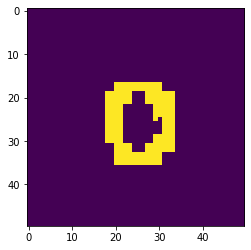

146 140


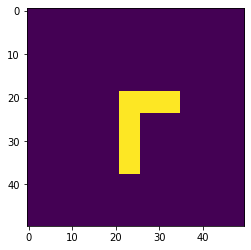

147 221


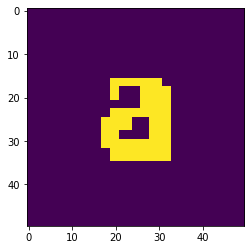

148 158


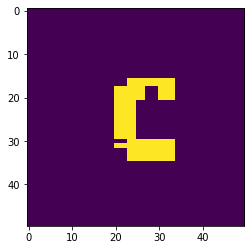

149 55


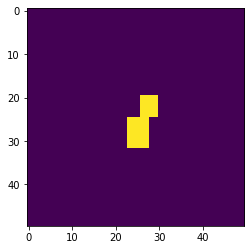

150 146


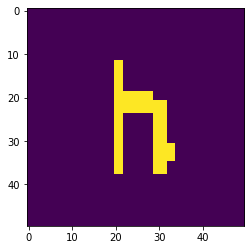

151 69


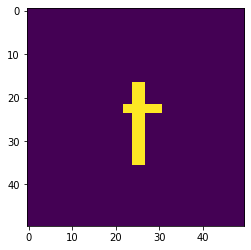

152 162


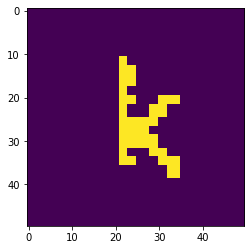

153 207


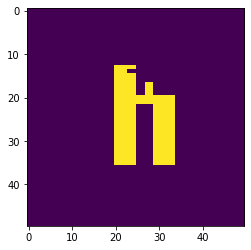

154 146


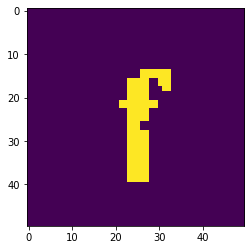

155 136


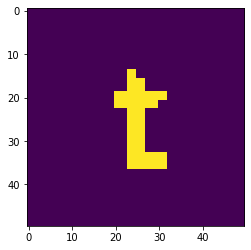

156 156


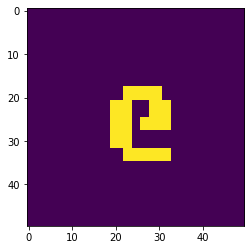

157 210


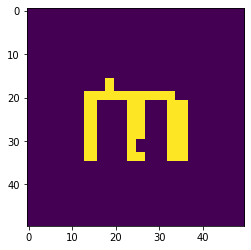

158 130


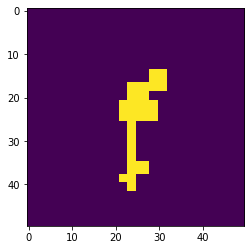

159 160


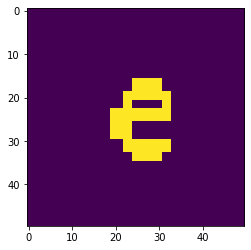

160 220


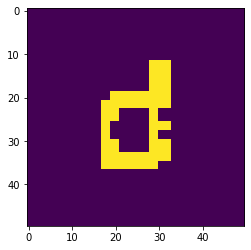

161 232


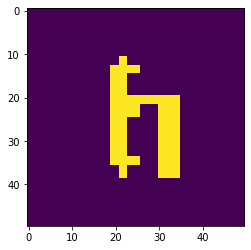

162 215


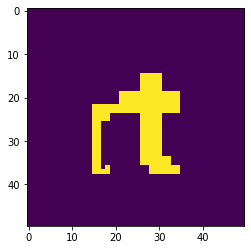

163 138


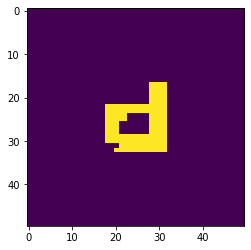

164 78


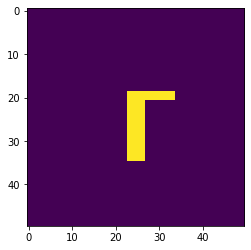

165 165


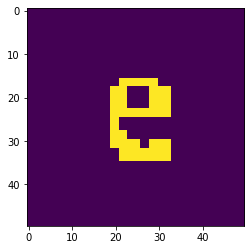

166 117


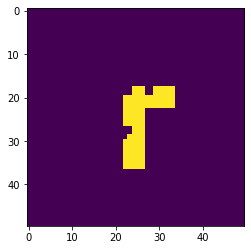

167 171


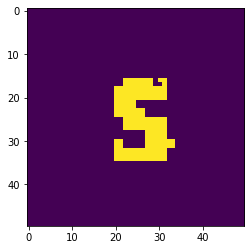

168 164


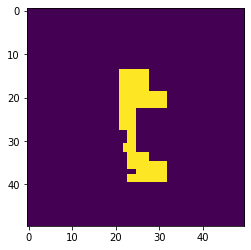

169 143


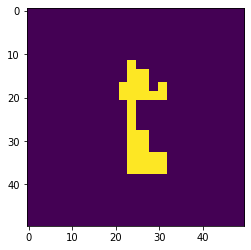

170 437


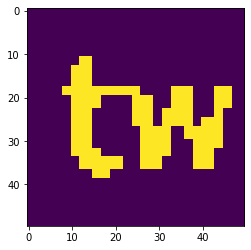

171 188


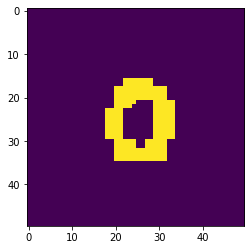

172 216


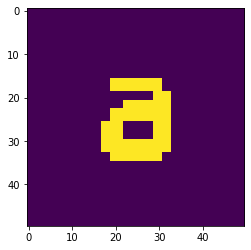

173 111


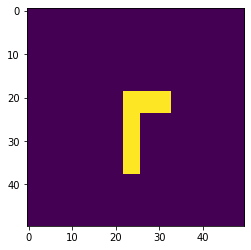

174 185


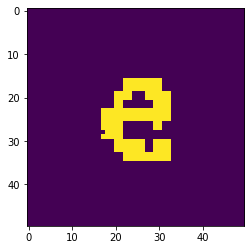

175 194


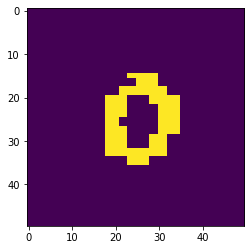

176 314


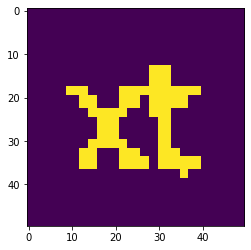

177 185


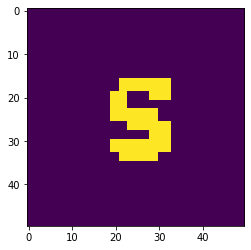

178 185


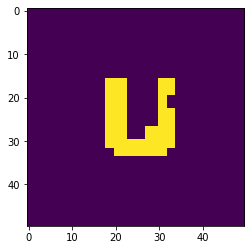

179 178


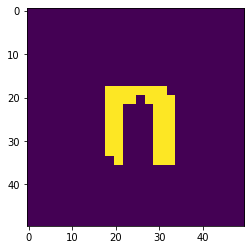

180 203


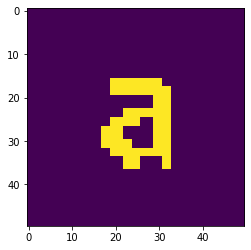

181 213


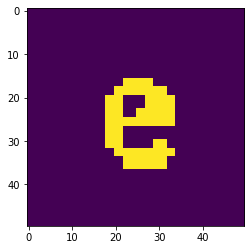

182 230


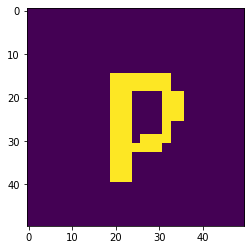

183 185


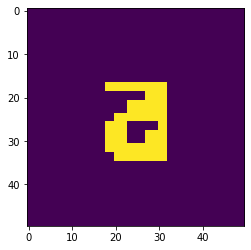

184 218


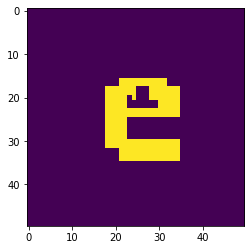

185 206


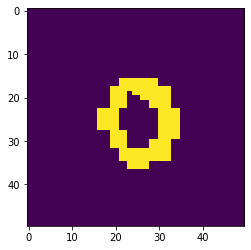

186 234


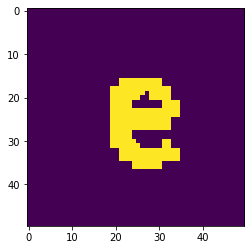

187 131


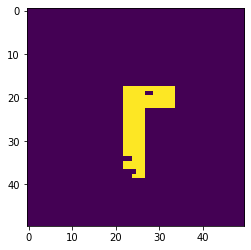

188 187


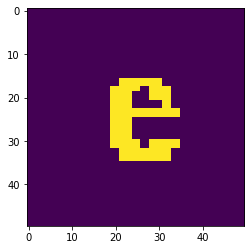

189 274


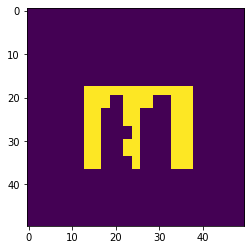

190 163


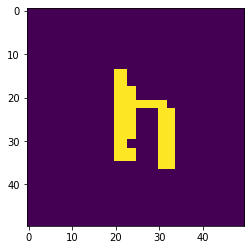

191 206


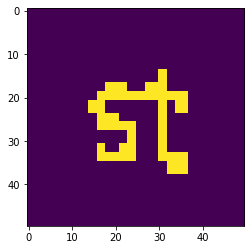

192 64


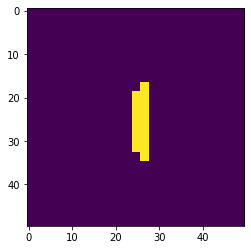

193 323


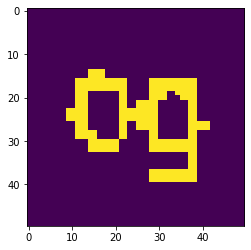

194 178


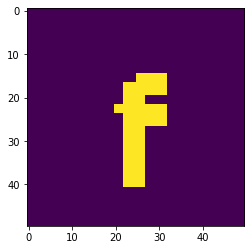

195 97


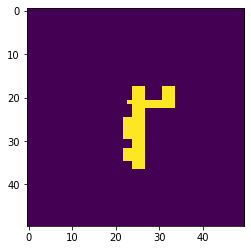

196 185


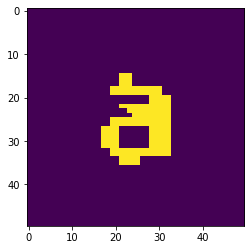

197 125


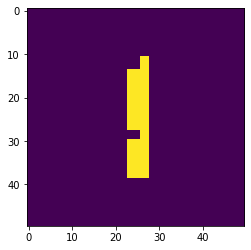

198 256


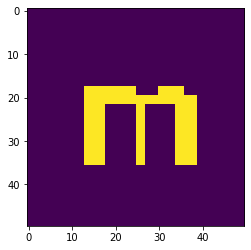

199 192


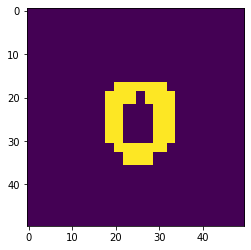

200 268


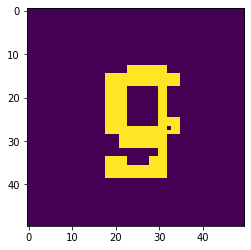

201 88


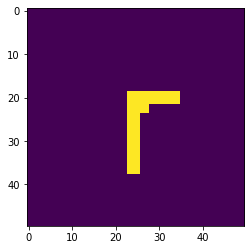

202 206


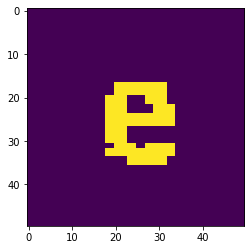

203 165


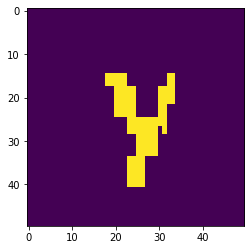

204 163


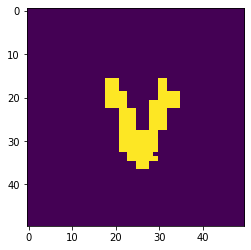

205 216


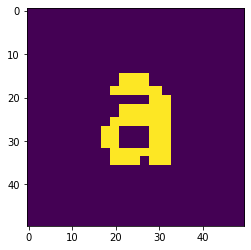

206 186


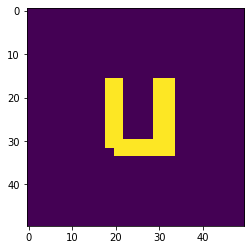

207 185


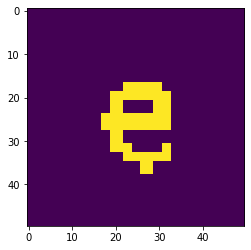

208 171


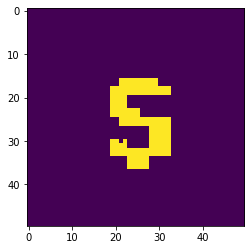

209 57


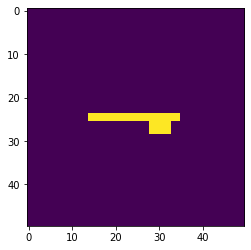

210 52


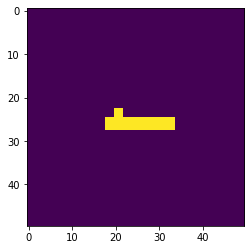

211 131


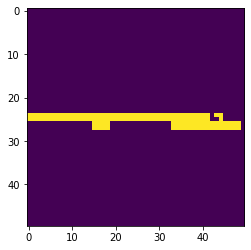

212 115


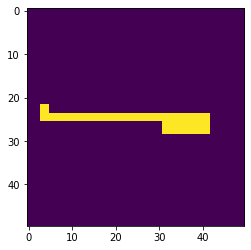

213 271


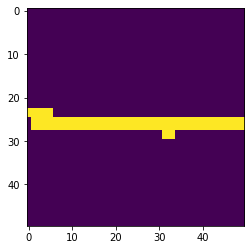

214 96


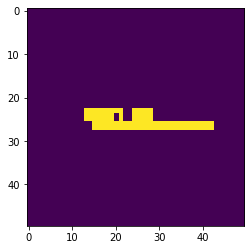

215 66


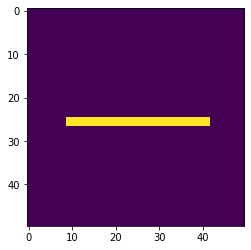

216 77


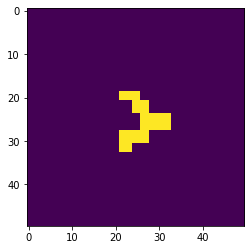

217 91


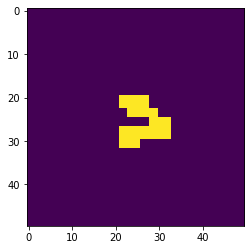

218 77


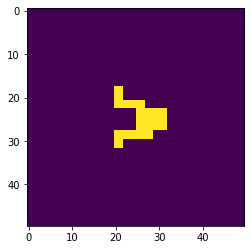

219 340


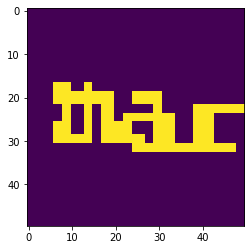

220 124


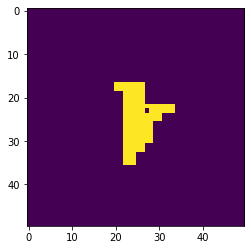

221 237


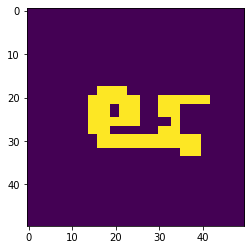

222 156


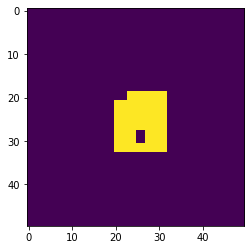

223 119


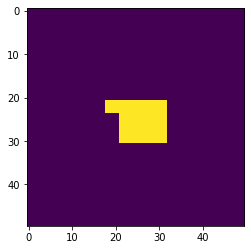

224 126


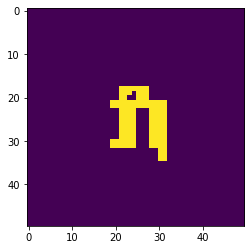

225 139


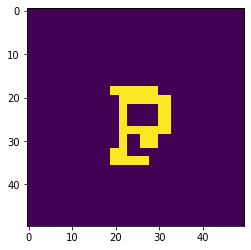

226 117


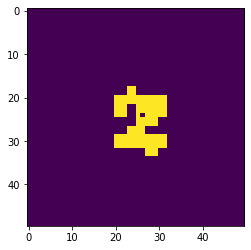

227 122


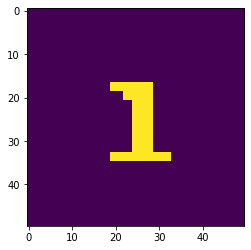

228 216


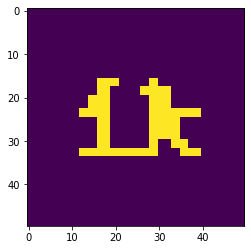

229 248


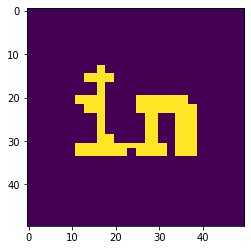

230 121


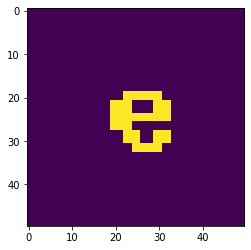

231 121


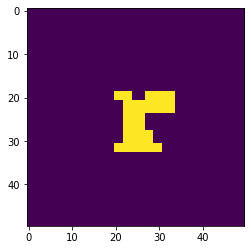

232 260


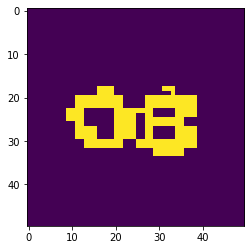

233 84


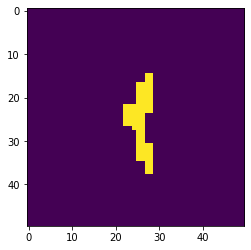

234 80


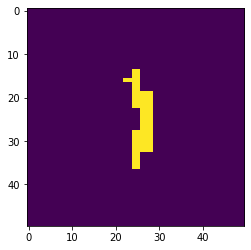

235 146


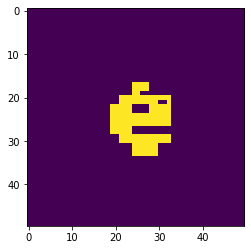

236 118


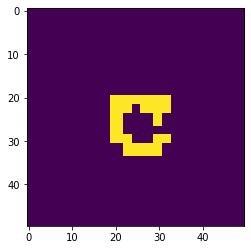

237 145


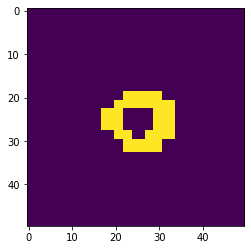

238 130


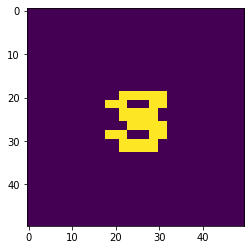

In [59]:
output = []
counter = 0
print(nb_labels)
for i in range(0,nb_labels): #only first 50
    image_cut = label_im==i #boolean array
    if sum(image_cut)>50 and sum(image_cut)<500: #little artificacts!
        print(counter, sum(image_cut)) #id number, number of pixels
        x,y = np.array(ndimage.center_of_mass(image_cut)).astype(int)
        imshow(image_cut[x-25:x+25,y-25:y+25])
        output.append(image_cut[x-25:x+25,y-25:y+25])
        counter +=1
        plt.show()

Template image 315


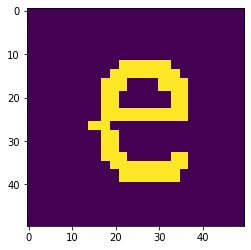

Test image 2500.0


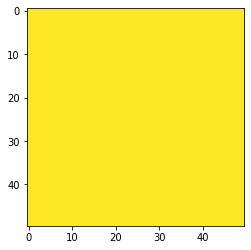

template*test image 315.0


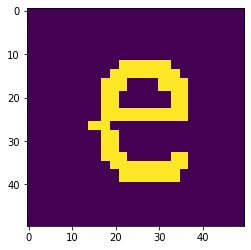

In [58]:
i = 3

template = output[5]

print("Template image", np.sum(template))
imshow(template,vmin=0,vmax=1)
plt.show()
test = np.ones((50,50))
print("Test image", np.sum(test))
imshow(test,vmin=0,vmax=1)
plt.show()

print("template*test image", np.sum(test*template))
imshow(test.astype(int)+template.astype(int)/2)
plt.show()


0 184
1 203
2 164
3 126
4 142
5 315


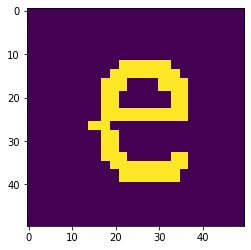

6 152
7 52
8 234
9 195
10 223
11 198
12 268


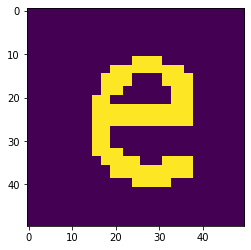

13 195
14 264


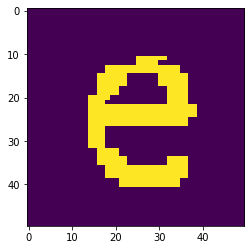

15 146
16 278


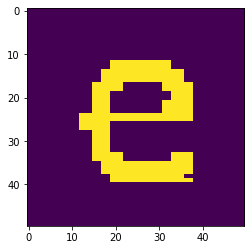

17 199
18 218
19 72
20 205
21 186
22 52
23 25
24 33
25 45


In [48]:
template = output[5]

for n,i in enumerate(output):
    print(n, np.sum(template*i))
    if np.sum(template*i)>260:
        imshow(i)
        plt.show()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


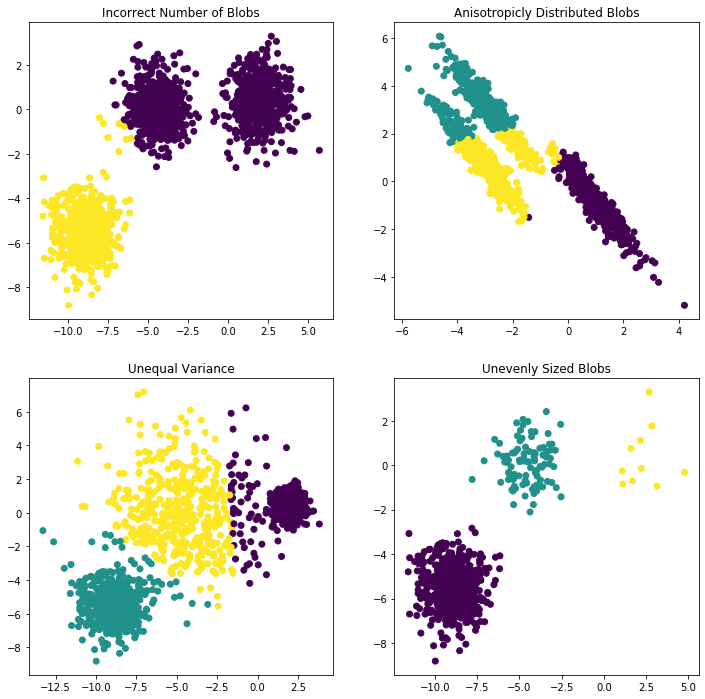

In [60]:
%pylab inline
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


In [66]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)


In [68]:
X_varied.shape

(1500, 2)

In [69]:
y_pred.shape

(1500,)

## Gaussian Mixture Models

Automatically created module for IPython interactive environment


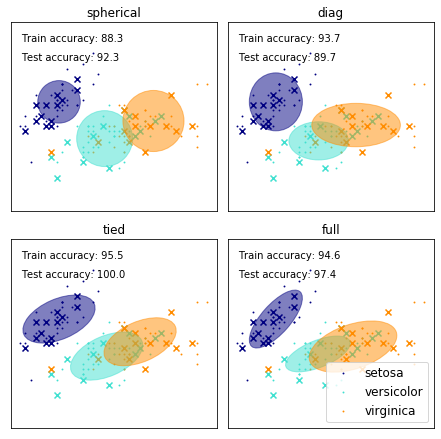

In [70]:
#example from website

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()


Populating the interactive namespace from numpy and matplotlib


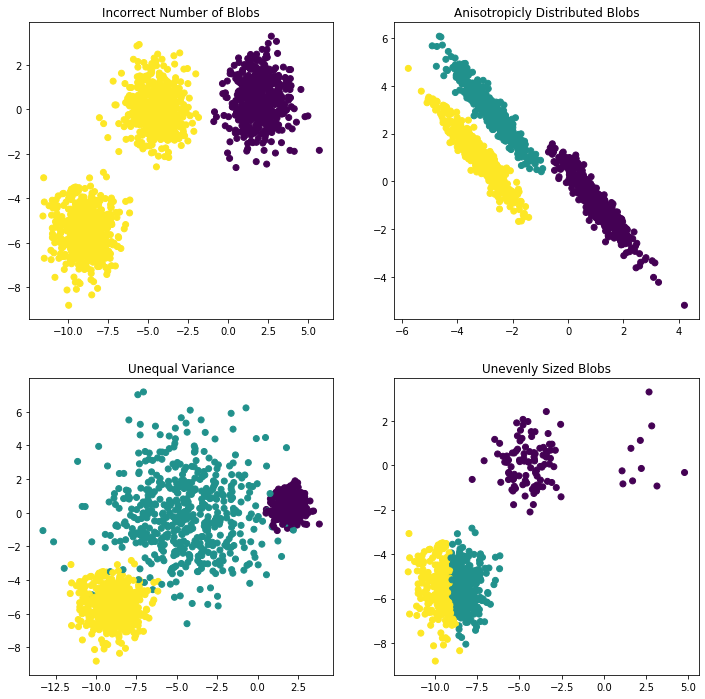

In [75]:
%pylab inline
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = GaussianMixture(n_components=2,
              covariance_type="full", max_iter=20, random_state=0).fit_predict(X_aniso)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = GaussianMixture(n_components=3,
              covariance_type="full", max_iter=20, random_state=0).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = GaussianMixture(n_components=3,
              covariance_type="full", max_iter=20, random_state=0).fit_predict(X_aniso)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = GaussianMixture(n_components=3,
              covariance_type="full", max_iter=20, random_state=0).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


In [76]:
GaussianMixture?